# South Australia Crime Data 
## Data 
Data is courtesy of **South Australian Government Data Directory & SAPOL**. 

[CRIME DATA](https://data.sa.gov.au/data/dataset/crime-statistics) 
[SUBURB DATA](https://data.sa.gov.au/data/dataset/suburb-boundaries/resource/58b3b8ef-f292-4e27-a7bc-215ad7670cda)

## Problem
Clean, Visualise and identify South Australian Crime data trends
https://monkeylearn.com/data-cleaning/
https://monkeylearn.com/blog/data-cleaning-python/

### Cleaning: Will be split into three categoties
1. **Data exploring:** Understanding the data, noting any changes that need to be implmented on the data and identifying patterns, elements and relationships
2. **Data Filtering:** remove record that wont be useful downstream
3. **Data Cleaning:** remove as much noise as possible

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_crime = pd.read_csv('resources/2018-19-data_sa_crime.csv')
data = pd.DataFrame(data_crime)
data_suburb = pd.read_csv('resources/SASuburbs.csv')
suburb = pd.DataFrame(data_suburb)
data.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2018,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
1,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0
2,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0
3,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0
4,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0


# Locate missing data 
Locate missing data using the python funciton `isnull()`, which will identify every where within our data set where there is missing values.This function will return a list where `True` indicates a missing value. We then use the `sum()` function will return the number of missing elements per column 

In [3]:
data.isnull().sum()

Reported Date                    1
Suburb - Incident              197
Postcode - Incident            373
Offence Level 1 Description      1
Offence Level 2 Description      1
Offence Level 3 Description      1
Offence count                    1
dtype: int64

# Cleaning
Looking at the above table, it is evident that the key columns of this data set are:
1. Reported Date 
2. Postcode - Incident
3. Offence Level 1 Description
4. Offence count

## Replacing missing data
- Missing data within the *Suburb - Incident* row can be filled assuming the post code is known. 

- We will not be filling *Postcode - Incident* information that is missing as multiple postcodes can have the same or differnt suburb name i.e. *Postcode - Incident* is an **identifier** where as *Suburb - Incident* is an **identity**

# Removing data
- Any column which is missing the aforementioned four missing values will be removed as they are critical to this analysis


In [4]:
# remove empty row
remove = ['Suburb - Incident','Reported Date','Offence count','Offence Level 1 Description']
data.dropna(subset=remove, inplace=True)
data.isnull().sum()

Reported Date                    0
Suburb - Incident                0
Postcode - Incident            182
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence count                    0
dtype: int64

# Clean suburbs data 
The suburbs datas set only needs two rows, being the zipcode row and the suburb name row.


In [5]:
suburb.head()

,_id,postcode,suburb,suburb_num,legalstart,shape_Leng,shape_Area
0,1,872,AMATA,87206,00000000,0.258469,0.003274
1,2,872,ANANGU PITJANTJATJARA YANKUNYTJATJARA,87205,00000000,16.039186,9.288729
2,3,872,AYERS RANGE SOUTH,87202,26/04/2013,1.466852,0.117333
3,4,872,DE ROSE HILL,87201,26/04/2013,1.685673,0.167839
4,5,872,IWANTJA,87209,00000000,0.143976,0.001144


In [6]:
# remove the following columns, becayse we dont need them
remove = ['_id','suburb_num','legalstart','shape_Leng','shape_Area']
suburb.drop(remove, inplace = True, axis =1)
suburb.head()

,postcode,suburb
0,872,AMATA
1,872,ANANGU PITJANTJATJARA YANKUNYTJATJARA
2,872,AYERS RANGE SOUTH
3,872,DE ROSE HILL
4,872,IWANTJA


In [7]:
#check there are no missing values in the data
suburb.isnull().sum()

postcode    0
suburb      0
dtype: int64

# Update Missing Data 
Here we will add zipcodes to all missing suburbs within our `data` dataframe.

To do this we create transform the `subrurb` dataframe into a dictionary where the key is the suburb name and the value is the suburb postcode.


In [8]:
suburb_titles = list(suburb.columns)
suburb_titles

['postcode', 'suburb']

In [9]:
# swap titles
suburb_titles[0], suburb_titles[1] = suburb_titles[1], suburb_titles[0]
suburb_titles

['suburb', 'postcode']

In [10]:
# swap order of data 
suburb = suburb[suburb_titles]
suburb

,suburb,postcode
0,AMATA,872
1,ANANGU PITJANTJATJARA YANKUNYTJATJARA,872
2,AYERS RANGE SOUTH,872
3,DE ROSE HILL,872
4,IWANTJA,872
...,...,...
1888,MULOORINA,5733
1889,MUNDOWDNA,5733
1890,MUNGERANIE,5733
1891,CROWN POINT,5734


In [11]:
#convert suburb dataframe into dictionary
dic_suburb = suburb.set_index('suburb').to_dict()['postcode']

In [12]:
# add zipcodes to suburbs
for index, row in data.iterrows():
    if pd.isnull(data.loc[index, 'Postcode - Incident']) == True:
        #replace postcode NAN @ index, with the value of key Suburb
        data.replace({row['Postcode - Incident'], index},dic_suburb[row['Suburb - Incident']], inplace=True)
        

In [13]:
# check for duplicates
data.duplicated().sum()

0

# Normalising Data
ensure all data is in the same format i.e. case size

In [14]:
data_titles = list(data.columns)
#data_titlesNormalising

In [15]:
data['Suburb - Incident'] = data['Suburb - Incident'].str.upper()
data['Offence Level 1 Description'] = data['Offence Level 1 Description'].str.upper()
data['Offence Level 2 Description'] = data['Offence Level 2 Description'].str.upper()
data['Offence Level 3 Description'] = data['Offence Level 3 Description'].str.upper()
data['Offence count'] = data['Offence count'].astype(int)
#data['Postcode - Incident']= data['Postcode - Incident'].astype(int)

In [16]:
display(data.dtypes)

Reported Date                  object
Suburb - Incident              object
Postcode - Incident            object
Offence Level 1 Description    object
Offence Level 2 Description    object
Offence Level 3 Description    object
Offence count                   int32
dtype: object

In [17]:
data.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2018,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,THEFT FROM MOTOR VEHICLE,1
1,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,OTHER PROPERTY DAMAGE AND ENVIRONMENTAL,1
2,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,OTHER THEFT,5
3,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,RECEIVE OR HANDLE PROCEEDS OF CRIME,1
4,1/07/2018,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,THEFT FROM MOTOR VEHICLE,1


# Get the number of crimes per-Offence Level 2 Description 
visualise how many offences are commited per offence.

In [92]:

crime = pd.DataFrame(data[:100].groupby(['Offence Level 2 Description'])['Offence count'].count())

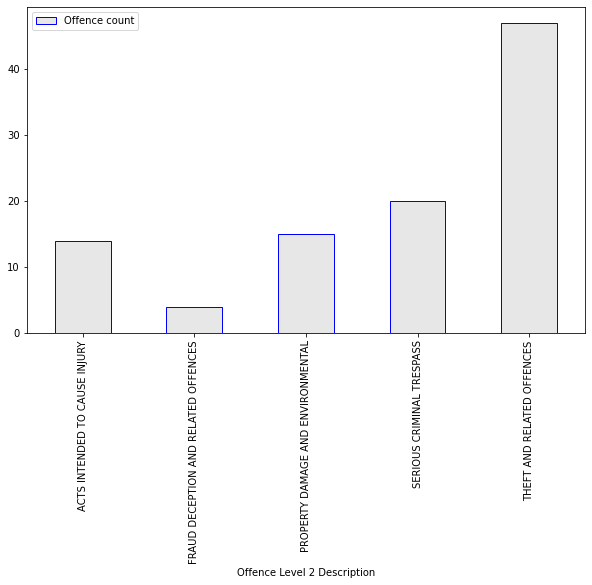

In [124]:
# update figure size 
plt.rcParams['figure.figsize'] = (10,6)
# plot crime in bar chart
crime.plot.bar(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
# Show graph
plt.show()